In [1]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'x': [1.9, 1, 2, 3, 4, 4, 5, 5, 6, 7, 7, 8, 8, 9, 10, 10,
                         11, 12, 12, 13, 14, 15, 15, 16, 17, 18, 18, 19, 20, 20],
                   'y': [3, 5, 6, 10, 13, 15, 17, 14, 20, 23, 25, 27, 30, 30, 31,
                         33, 32, 32, 30, 32, 34, 34, 37, 35, 34, 36, 34, 37, 38, 36]})

#view first five rows of DataFrame
df.head()

,x,y
0,1.9,3
1,1.0,5
2,2.0,6
3,3.0,10
4,4.0,13


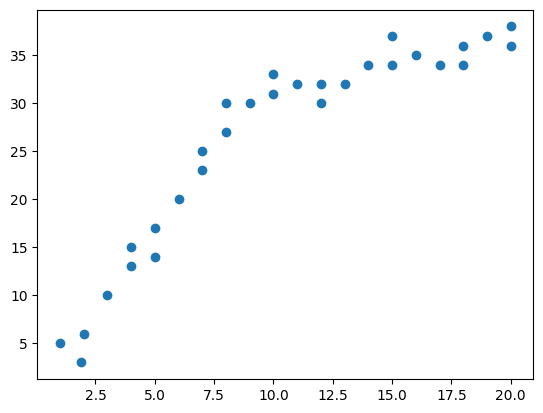

In [2]:
import matplotlib.pyplot as plt

#create scatterplot
plt.plot(df.x, df.y, 'o')

In [3]:
!pip install chowtest

/bin/bash: /home/usuario/Documents/bss-analysis/virtualenv/bin/pip: /home/usuario/Documentos/bss-analysis/virtualenv/bin/python3: bad interpreter: No such file or directory


In [4]:
from chow_test import chowtest

ImportError: cannot import name 'chowtest' from 'chow_test' (/home/usuario/Documents/bss-analysis/virtualenv/lib/python3.8/site-packages/chow_test/__init__.py)

In [ ]:
type(df.iloc[:]['y'])

: 

In [ ]:
chow_test(y_series=df.iloc[:]['y'], X_series=df.iloc[:]['x'],
         last_index=15,
         first_index=16,
         significance=.05)

: 

In [ ]:
oi[1]

: 

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import LinearAxis, Range1d
import pandas as pd

import pandas as pd
import numpy as np
import os
import sys
sys.path.append('./data_analysis')

if 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'trips/analysis/'
destination_folder_path = data_folder + 'charts/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/data.csv')

trips = pd.read_csv(source_folder_path + 'trips_grouped_by_month_mean.csv')

from modules.DataPreparation import DataPreparation
dp = DataPreparation()

covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)

trips = dp.transform_to_datetime(trips, ['date'])
trips = dp.transform_to_time_series(trips, 'date', drop = False)

trips_and_covid = pd.merge(trips, covid_data, left_index=True,
                            right_index=True, how = 'left')

trips_and_covid['date_trips'] = trips_and_covid.index

: 

In [ ]:
trips['date']

: 

In [ ]:
trips

: 

In [ ]:
!pip install statsmodels

: 

: 

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def find_best_ploy_fit(trips, variable, poly_degree = 1, period = '', filename = '', save = True):
    plt.clf()
    plt.figure(figsize =(12, 8))
    # df = trips.loc['2019':]
    df = trips
    # df = trips.reset_index(drop=True)
    df['range'] = list(range(len(df)))
    x1 = df.loc[:'2020-03-24','range']
    y1 = df.loc[:'2020-03-24', variable]

    x2 = df.loc['2020-03-24':,'range']
    y2 = df.loc['2020-03-24':, variable]

    # x3 = df.loc['2021-11':,'range']
    # y3 = df.loc['2021-11':, variable]

    index = [i for i in range(len(df))]

    coeffs1 = np.polyfit(x1, y1, poly_degree)
    print()
    poly_eqn = np.poly1d(coeffs1)
    y_hat1 = poly_eqn(x1)

    coeffs2 = np.polyfit(x2, y2, poly_degree)
    poly_eqn = np.poly1d(coeffs2)
    y_hat2 = poly_eqn(x2)

    # coeffs = np.polyfit(x3, y3, poly_degree)
    # poly_eqn = np.poly1d(coeffs)
    # y_hat3 = poly_eqn(x3)

    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax.plot(df.index, df.loc[:, variable], 'ro')
    # y_hat1 = np.pad(y_hat1, (None,len(index) - len(y_hat1)))
    y_hat1 = np.concatenate((y_hat1,[None]*(len(df.index) - len(y_hat1))))
    y_hat2 = np.concatenate(([None]*(len(df.index) - len(y_hat2)), y_hat2))
    # y_hat2 = np.concatenate(([None]*(len(x1)), y_hat2, [None]*(len(x3))))
    # y_hat3 = np.concatenate(([None]*(len(df.index) - len(y_hat3)), y_hat3))
    plt.plot(df.index,y_hat1)
    plt.plot(df.index,y_hat2)
    # plt.plot(df.index,y_hat3)
    plt.ylim(bottom=0)
    plt.ylim(top=trips[variable].max()*1.05)
    # ax.axvline(pd.to_datetime('2020-03-06'), color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline(pd.to_datetime('2020-03-24'), color="black", linestyle="--",  label='Início da quarentena')

    title = 'Monthly variation of variable {variable}'.format(variable = variable)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.title(title, size=22, pad = 10)
    if save:
        filename = variable + '_' + filename + '_' + str(poly_degree) + '.png'
        plt.savefig(destination_folder_path + filename) 
    return coeffs1,coeffs2

: 

In [ ]:
variable = 'tripduration'
coeffs = find_best_ploy_fit(trips, variable, 1, 'Before Covid for ', 'before', False)

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def find_best_ploy_fit_trip_duration(trips, variable, poly_degree = 1, filename = '', save = True):
    plt.clf()
    plt.figure(figsize =(12, 8))
    # df = trips.loc['2019':]
    df = trips
    df['tripduration_min'] = df['tripduration'].apply(lambda x : x/60)
    variable = 'tripduration_min'
    # df = trips.reset_index(drop=True)
    df['range'] = list(range(len(df)))
    x1 = df.loc[:'2020-8','range']
    y1 = df.loc[:'2020-8', variable]

    x2 = df.loc['2020-9':'2021-4','range']
    y2 = df.loc['2020-9':'2021-4', variable]

    x3 = df.loc['2021-5':,'range']
    y3 = df.loc['2021-5':, variable]

    coeffs1 = np.polyfit(x1, y1, poly_degree)
    print()
    poly_eqn = np.poly1d(coeffs1)
    y_hat1 = poly_eqn(x1)

    coeffs2 = np.polyfit(x2, y2, poly_degree)
    poly_eqn = np.poly1d(coeffs2)
    y_hat2 = poly_eqn(x2)

    coeffs3 = np.polyfit(x3, y3, poly_degree)
    poly_eqn = np.poly1d(coeffs3)
    y_hat3 = poly_eqn(x3)

    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax.plot(df.index, df.loc[:, variable], 'ro')
    # y_hat1 = np.pad(y_hat1, (None,len(index) - len(y_hat1)))
    y_hat1 = np.concatenate((y_hat1,[None]*(len(df.index) - len(y_hat1))))
    # y_hat2 = np.concatenate(([None]*(len(df.index) - len(y_hat2)), y_hat2))
    y_hat2 = np.concatenate(([None]*(len(x1)), y_hat2, [None]*(len(x3))))
    y_hat3 = np.concatenate(([None]*(len(df.index) - len(y_hat3)), y_hat3))
    plt.plot(df.index,y_hat1)
    plt.plot(df.index,y_hat2)
    plt.plot(df.index,y_hat3)
    plt.ylim(bottom=0)
    plt.ylim(top=trips[variable].max()*1.05)
    # ax.axvline(pd.to_datetime('2020-03-06'), color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline(pd.to_datetime('2020-03-24'), color="black", linestyle="--",  label='Lockdown in SP (2020-03-24)')
    # ax.axvline(pd.to_datetime('2020-09-01'), color="black", linestyle="--",  label='Criação plano profissional')
    # ax.axvline(pd.to_datetime('2021-05-01'), color="black", linestyle="--",  label='Criação plano profissional')

    # set monthly locator
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()

    ax.set_xlabel('Date', color='k', fontsize=22, labelpad = 10)
    ax.set_ylabel('Trip duration (min)', color='k', fontsize=22, labelpad = 10)

    title = 'Average trip duration'.format(variable = variable)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.title(title, size=28, pad = 15)
    # ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize = 18)
    ax.legend(loc = 'lower right',fontsize = 22)
    if save:
        filename = variable + '_' + filename + '_' + str(poly_degree) + '.png'
        plt.savefig(destination_folder_path + filename) 
    return coeffs1,coeffs2, coeffs3

: 

In [ ]:
variable = 'tripduration'
coeffs = find_best_ploy_fit_trip_duration(trips, variable, 1, 'before', False)

: 

In [ ]:
coeffs

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_trip_duration(trips, variable, poly_degree = 1, filename = '', save = True):
    plt.clf()
    plt.figure(figsize =(12, 8))
    # df = trips.loc['2019':]
    df = trips
    df['tripduration_min'] = df['tripduration'].apply(lambda x : x/60)
    variable = 'tripduration_min'
    # df = trips.reset_index(drop=True)
    df['range'] = list(range(len(df)))

    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax.plot(df.index, df.loc[:, variable], 'ro')
    plt.ylim(bottom=0)
    plt.ylim(top=trips[variable].max()*1.05)
    # ax.axvline(pd.to_datetime('2020-03-06'), color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline(pd.to_datetime('2020-03-24'), color="black", linestyle="--",  label='Lockdown in SP (2020-03-24)')
    # ax.axvline(pd.to_datetime('2020-09-01'), color="black", linestyle="--",  label='Criação plano profissional')
    # ax.axvline(pd.to_datetime('2021-05-01'), color="black", linestyle="--",  label='Criação plano profissional')

    # set monthly locator
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()

    ax.set_xlabel('Date', color='k', fontsize=22, labelpad = 10)
    ax.set_ylabel('Trip duration (min)', color='k', fontsize=22, labelpad = 10)

    title = 'Average trip duration'.format(variable = variable)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.title(title, size=28, pad = 15)
    # ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize = 18)
    ax.legend(loc = 'lower right',fontsize = 22)
    if save:
        filename = variable + '_' + filename + '_' + str(poly_degree) + '.png'
        plt.savefig(destination_folder_path + filename) 
    return 0

: 

In [ ]:
variable = 'tripduration'
coeffs = plot_trip_duration(trips, variable, 1, 'before', False)

: 

In [ ]:
coeffs

: 

In [6]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import LinearAxis, Range1d
import pandas as pd

import pandas as pd
import numpy as np
import os
import sys
sys.path.append('./data_analysis')

if 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'trips/preprocessed/grouped/'
destination_folder_path = data_folder + 'charts/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/data.csv')

trips = pd.read_csv(source_folder_path + 'trips_grouped_by_month_mean.csv')

from modules.DataPreparation import DataPreparation
dp = DataPreparation()

covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)

trips_chow = dp.transform_to_datetime(trips, ['date'])

In [ ]:
trips = trips.set_index('date', drop = True)
trips['index'] = list(range(len(trips)))
trips

: 

In [ ]:
!pip install linearmodels

: 

In [ ]:
from linearmodels.datasets import meps
import statsmodels.api as sm
import pandas as pd
data = meps.load()
data = data.dropna()
data = sm.add_constant(data)
y = data.income
X = data.drop('income',axis=1)
X_b = X[X.black==1].drop('black',axis=1)
y_b = data.income[X.black==1]
X_nb = X[X.black==0].drop('black',axis=1)
y_nb = data.income[X.black==0]

: 

In [ ]:
X.shape

: 

In [ ]:
y = trips.tripduration
X = trips['index']
X_b = X[:'2021-09-01']
y_b = y[:'2021-09-01']
X_nb = X['2021-09-02':]
y_nb = y['2021-09-02':]

: 

In [ ]:
J = 1
k = 1
N1 = X_b.shape[0]
N2 = X_nb.shape[0]

: 

In [ ]:
y_b

: 

In [ ]:
X_nb

: 

In [ ]:
y_nb

: 

In [ ]:
X_nb

: 

In [ ]:
import statsmodels.api as sm
model_dummy = sm.OLS(y,X).fit()
RSSd = model_dummy.ssr
model_b = sm.OLS(y_b,X_b).fit()
RSSb = model_b.ssr
model_nb = sm.OLS(y_nb,X_nb).fit()
RSSnb = model_nb.ssr

: 

In [ ]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))

: 

In [ ]:
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

: 

In [ ]:
!pip install chowtest

: 

In [ ]:
trips

: 

In [ ]:
from chow_test import Chowtest

: 

In [ ]:
chow_test(y_series=pd.Series(trips_chow['tripduration']),
            X_series=pd.Series(trips_chow.index),
            last_index=26,
            first_index=27,
            significance=0.05)

: 

In [ ]:
trips

: 

In [ ]:
chow_test(y_series=pd.Series(trips_chow[1:25]['tripduration']),
            X_series=pd.Series(trips_chow[1:25].index),
            last_index=10,
            first_index=11,
            significance=0.05)

: 

In [ ]:
chow_test(y_series=pd.Series(trips_chow['tripduration']),
            X_series=pd.Series(trips_chow.index),
            last_index=10,
            first_index=11,
            significance=0.05)

: 

In [ ]:
trips_chow.loc[26]

: 

In [ ]:
results_chow = pd.DataFrame(columns = ['break_date','chow_stat', 'p_value'])
for i in range(1, len(trips_chow)-1):
    result_chow = chow_test(y_series=pd.Series(trips_chow['tripduration']),
            X_series=pd.Series(trips_chow.index),
            last_index=i,
            first_index=i+1,
            significance=0.05)
    results_chow = results_chow.append({'break_date' : trips_chow.loc[i]['date'], 'chow_stat' : result_chow[0],  'p_value' : result_chow[1], 'reject': result_chow[1] < 0.05}, ignore_index=True)
results_chow = results_chow.set_index('break_date')

: 

In [ ]:
results_chow

: 

In [ ]:
results_chow['reject'].plot()

: 

In [ ]:
results_chow['2019-06':'2021-01']['p_value'].plot()

: 

In [ ]:
results_chow[10:35]['p_value'].plot()

: 

In [ ]:
oi = []
oi.append(1)
oi

: 

: 

In [ ]:
chow_test(y_series=pd.Series(trips_chow[1:25]['tripduration']),
            X_series=pd.Series(trips_chow[1:25].index),
            last_index=11,
            first_index=12,
            significance=0.05)

: 

In [ ]:
chow_test(y_series=pd.Series(trips_t['tripduration']),
            X_series=pd.Series(trips_t.index),
            last_index=10,
            first_index=11,
            significance=0.05)

: 

In [ ]:
trips_t

: 

In [ ]:
trips['age'].plot()

: 